In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

file = './birthweight_low.xlsx'

bweight = pd.read_excel(io=file)

# importing from Excel, I got some "Unnamed" columns wit NaN values
# now getting rid of them
bweight = bweight[bweight.filter(regex='^(?!Unnamed)').columns] 

bweight.head(n=5)


,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


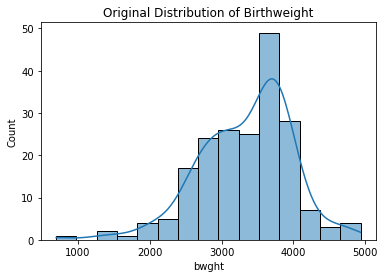

In [2]:
# developing a histogram using HISTPLOT
sns.histplot(data   = bweight,
          x      = 'bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "bwght") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()


In [3]:
# log transforming bwght and saving it to the dataset

bweight['log_bwght'] = np.log(bweight['bwght'])


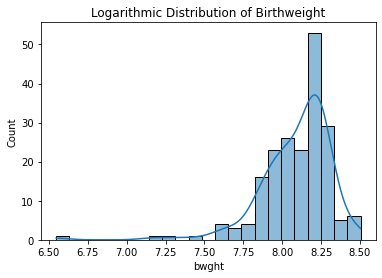

In [4]:
# developing a histogram using HISTPLOT
sns.histplot(data   = bweight,
          x      = 'log_bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Birthweight")
plt.xlabel(xlabel = "bwght")
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

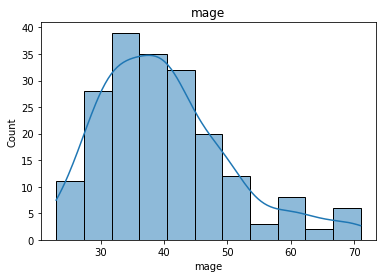

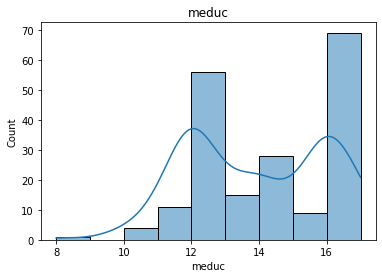

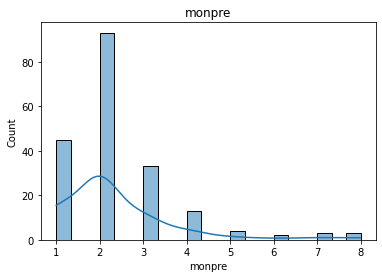

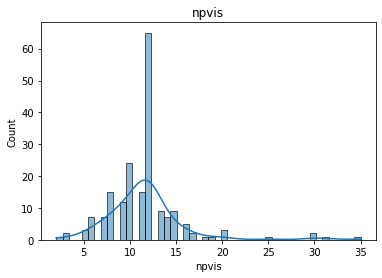

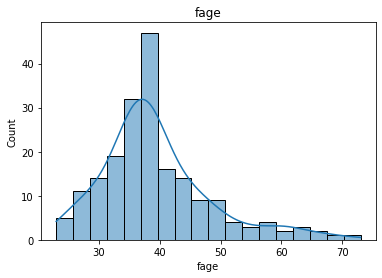

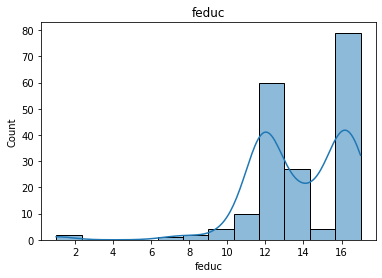

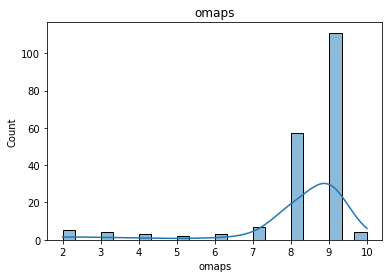

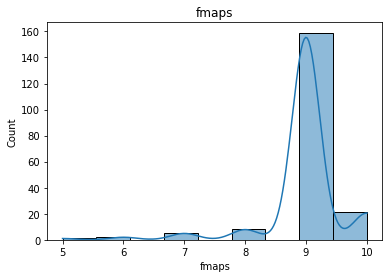

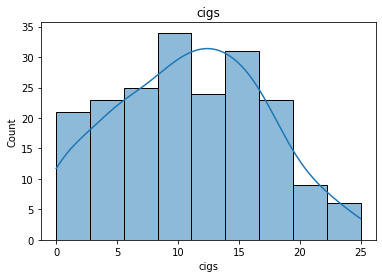

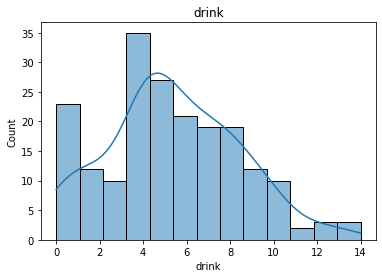

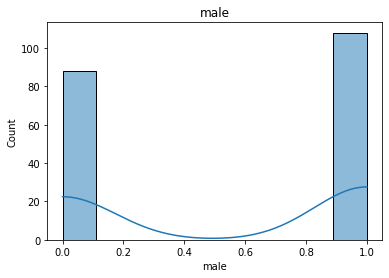

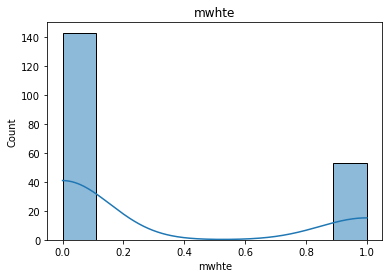

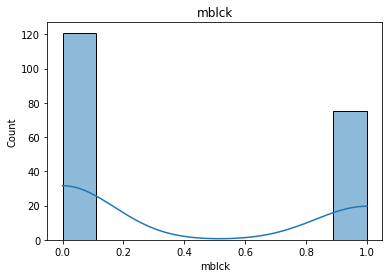

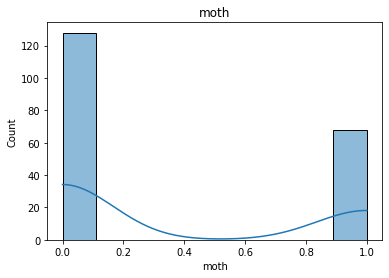

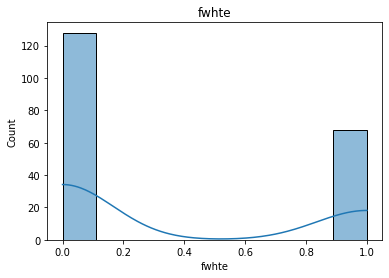

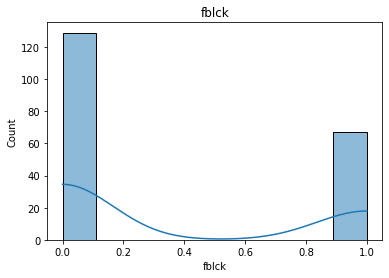

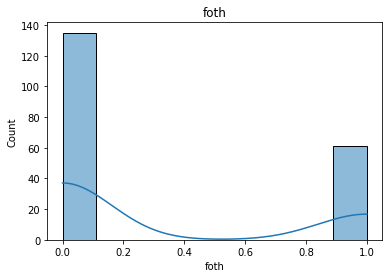

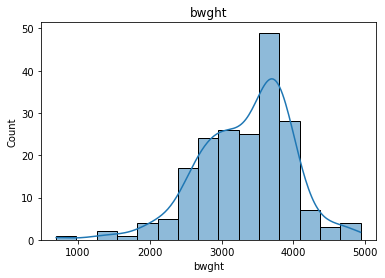

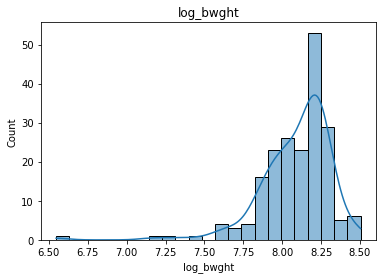

In [5]:
# developing a histogram using HISTPLOT
for feature in bweight:
    
    sns.histplot(data  = bweight,
          x      = feature,
          kde    = True)


    # title and axis labels
    plt.title(label   = feature)
    plt.xlabel(xlabel = feature)
    plt.ylabel(ylabel = "Count")

# displaying the histogram
    plt.show()

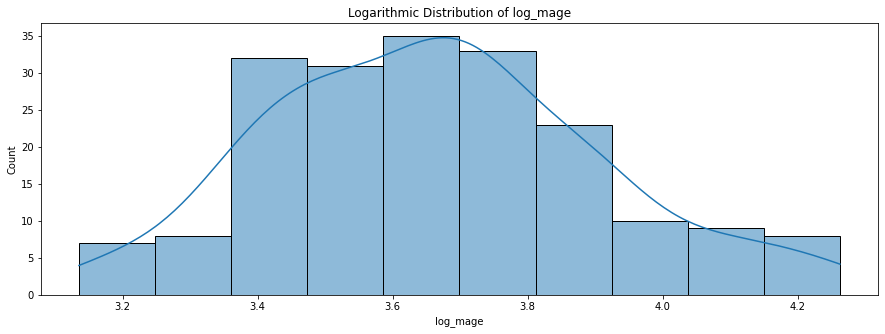

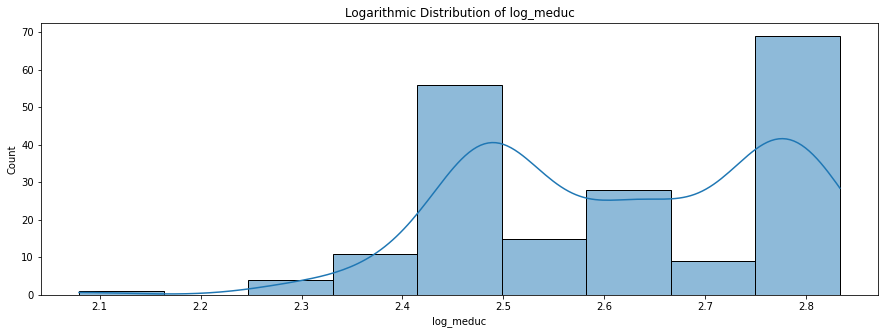

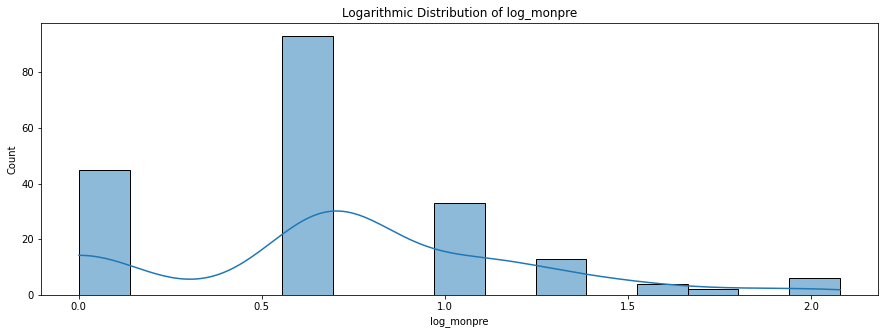

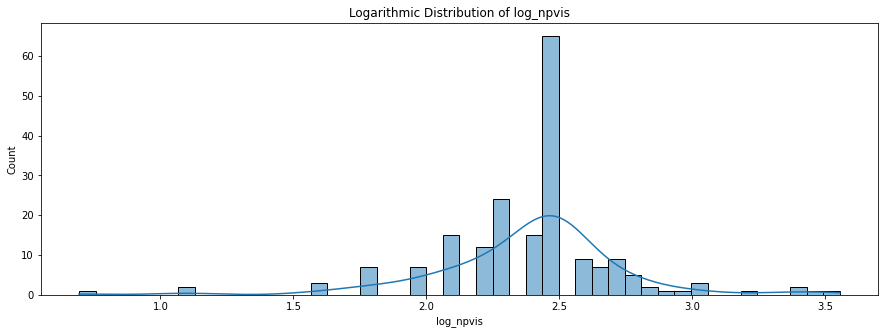

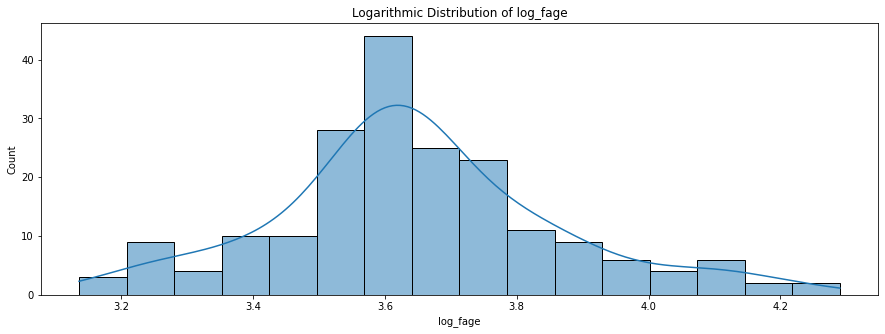

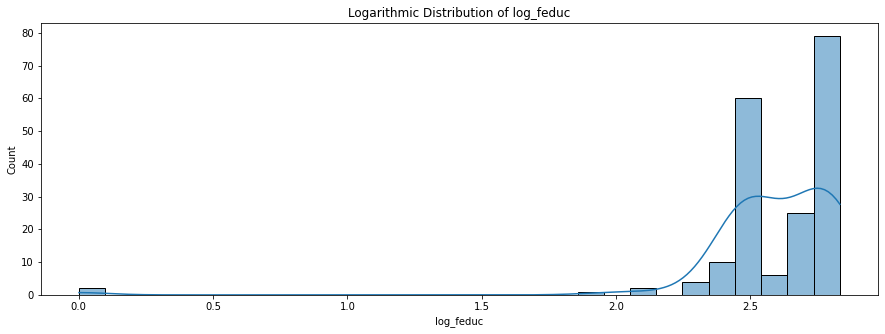

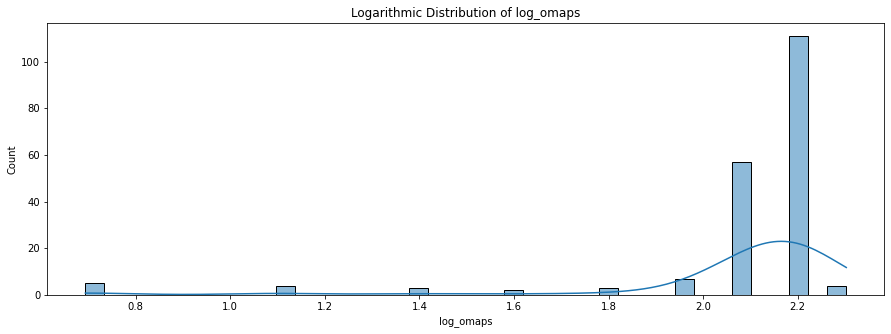

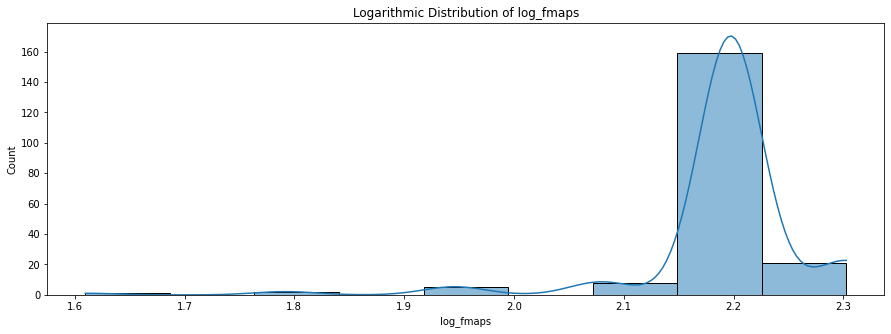

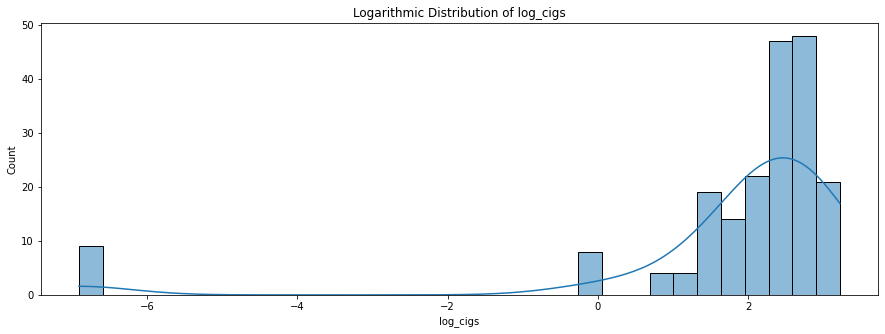

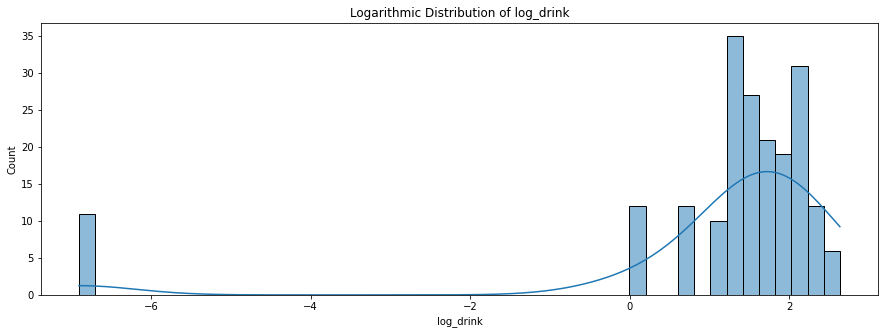

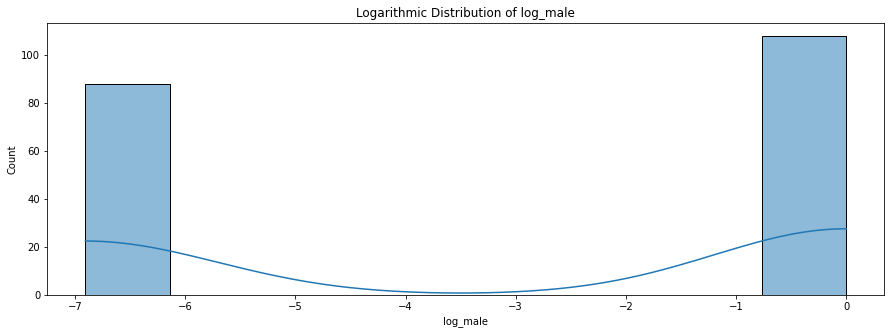

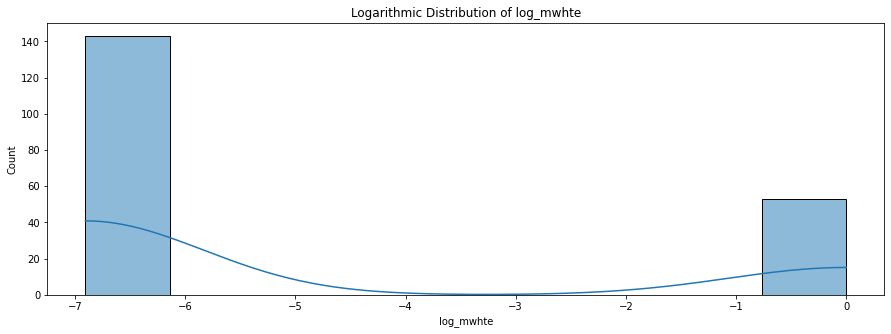

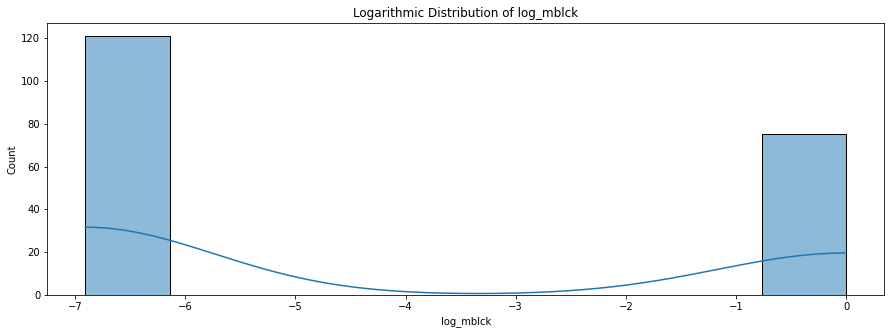

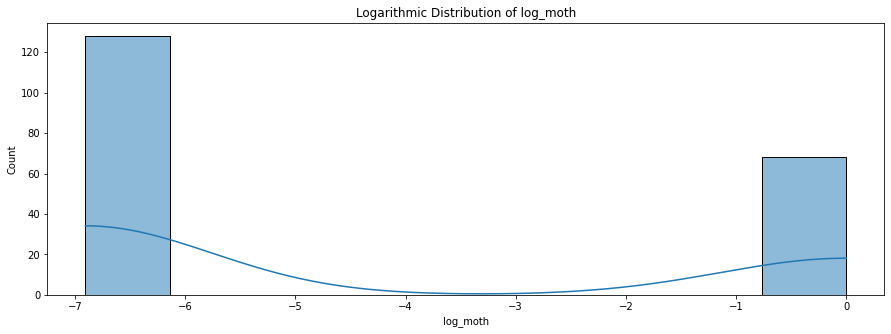

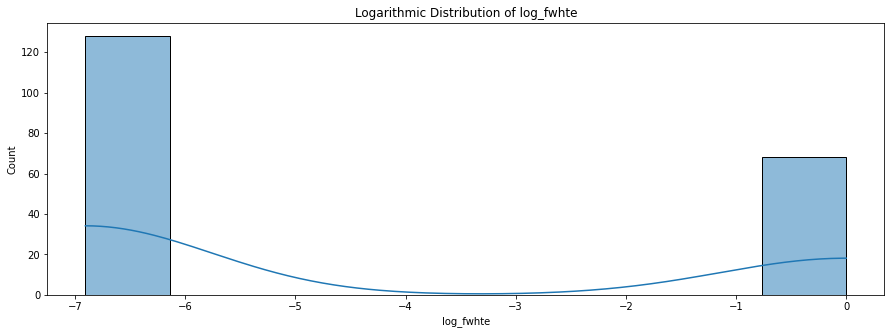

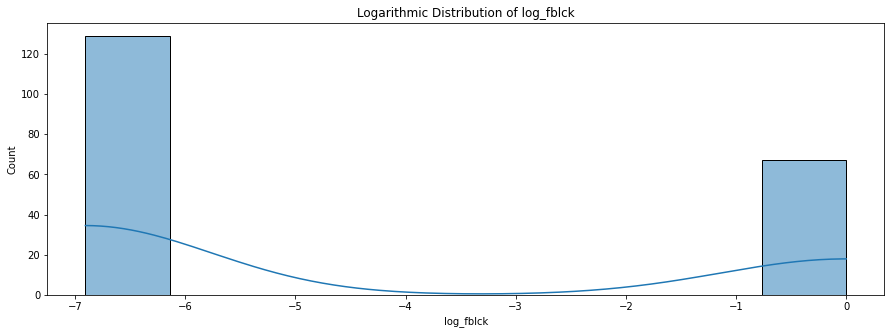

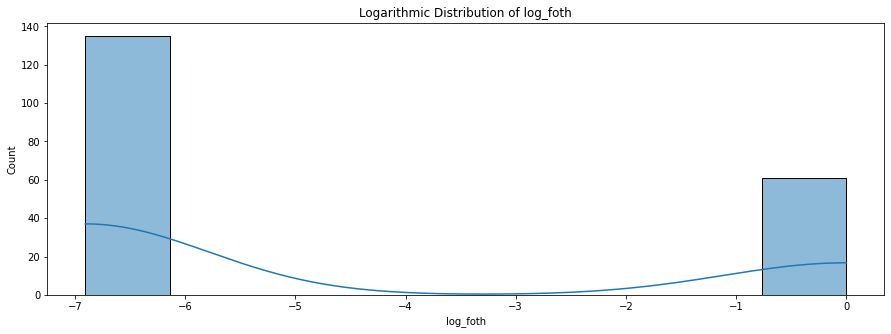

In [6]:
continuous_data = ["mage", "meduc", "monpre", "npvis", "fage", "feduc", "omaps",
                   "fmaps", "cigs", "drink", "male", "mwhte", "mblck", "moth",
                   "fwhte", "fblck", "foth"]

for explanatory in continuous_data:
    fig, ax = plt.subplots(figsize = (15,5))
    bweight[f"log_{explanatory}"] = np.log(bweight[explanatory] + 0.001)
    sns.histplot(data   = bweight,
                 x      = f"log_{explanatory}",
                 kde    = True)

    plt.title(label   = f"Logarithmic Distribution of log_{explanatory}")
    plt.xlabel(xlabel = f"log_{explanatory}") # avoiding using dataset labels
    plt.ylabel(ylabel = "Count")

In [7]:
# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """bwght ~ fage + 
                                           mage +
                                           cigs +
                                           drink
                                 """,
                                     data = bweight)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     115.8
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           5.83e-50
Time:                        12:11:07   Log-Likelihood:                -1425.4
No. Observations:                 196   AIC:                             2861.
Df Residuals:                     191   BIC:                             2877.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5022.2938    123.301     40.732      0.0

In [23]:
# taking the birthweight dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per column
bweight.isnull().sum(axis = 0)

mage          0
meduc         0
monpre        0
npvis         0
fage          0
feduc         0
omaps         0
fmaps         0
cigs          0
drink         0
male          0
mwhte         0
mblck         0
moth          0
fwhte         0
fblck         0
foth          0
bwght         0
log_bwght     0
log_mage      0
log_meduc     0
log_monpre    0
log_npvis     3
log_fage      0
log_feduc     0
log_omaps     0
log_fmaps     0
log_cigs      0
log_drink     0
log_male      0
log_mwhte     0
log_mblck     0
log_moth      0
log_fwhte     0
log_fblck     0
log_foth      0
dtype: int64

In [27]:
# imputing everything else with the median

# Feduc
fill = 0
bweight['feduc'] = bweight['feduc'].fillna(fill)


# Meduc
fill = 0
bweight['meduc'] = bweight['meduc'].fillna(fill)


# Log Meduc
fill = 0
bweight['log_meduc'] = bweight['log_meduc'].fillna(fill)

# Log Feduc
fill = 0
bweight['log_feduc'] = bweight['log_feduc'].fillna(fill)

# Log Npvis
fill = 0
bweight['log_npvis'] = bweight['log_npvis'].fillna(fill)

In [28]:
bweight.isnull().any(axis=0).any(axis=0)

False

In [29]:
bweight['log_omaps'] = np.log(bweight['omaps'])

In [30]:
# preparing explanatory variable data
bweight_data   = bweight.drop(['bwght',
                               'log_bwght',
                               'mage',
                               'log_omaps'],
                               axis = 1)


# preparing response variables
bweight_target = bweight.loc[ : , 'bwght']
log_bweight_target = bweight.loc[ : , 'log_bwght']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            bweight_data,
            bweight_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 32)
y-side: (147,)


Testing Data
------------
X-side: (49, 32)
y-side: (49,)



In [31]:
x_variables= ['meduc','npvis','fage','cigs','drink','male','mwhte','mblck',
              'foth']

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

meduc +
npvis +
fage +
cigs +
drink +
male +
mwhte +
mblck +
foth +


In [32]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = bweight.loc[ : , x_variables]


# preparing response variable
bweight_target = bweight.loc[ : , 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            bweight_data,     # x-variables
            bweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            bweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [33]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6938
OLS Testing Score  : 0.6716
OLS Train-Test Gap : 0.0222


In [34]:
import sklearn.linear_model # linear models

In [35]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7309
Lasso Testing Score  : 0.6302
Lasso Train-Test Gap : 0.1007


In [36]:
# zipping each feature name to its coefficient
lasso_model_values = zip(bweight_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 5231.6)
('meduc', 16.02)
('monpre', -0.0)
('npvis', -0.0)
('fage', -4.83)
('feduc', 5.07)
('omaps', 0.78)
('fmaps', 78.57)
('cigs', -36.43)
('drink', -112.14)
('male', 67.42)
('mwhte', 0.0)
('mblck', 0.0)
('moth', -21.35)
('fwhte', -0.0)
('fblck', 0.0)
('foth', 0.0)
('log_mage', -474.0)
('log_meduc', 0.0)
('log_monpre', 0.0)
('log_npvis', -0.0)
('log_fage', -0.0)
('log_feduc', 0.0)
('log_fmaps', 0.0)
('log_cigs', -0.0)
('log_drink', 17.98)
('log_male', 0.23)
('log_mwhte', 0.0)
('log_mblck', 0.0)
('log_moth', -2.22)
('log_fwhte', -0.0)
('log_fblck', 0.0)
('log_foth', 0.0)


In [37]:
# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 5231.6)
('meduc', 16.02)
('npvis', -0.0)
('fage', -4.83)
('feduc', 5.07)
('omaps', 0.78)
('fmaps', 78.57)
('cigs', -36.43)
('drink', -112.14)
('male', 67.42)
('mblck', 0.0)
('moth', -21.35)
('fblck', 0.0)
('log_mage', -474.0)
('log_monpre', 0.0)
('log_fage', -0.0)
('log_fmaps', 0.0)
('log_drink', 17.98)
('log_male', 0.23)
('log_mblck', 0.0)
('log_moth', -2.22)
('log_fblck', 0.0)


In [38]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(
                                         normalize = True)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)

# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('ARD Training Score :', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('ARD Testing Score  :', ard_model.score(x_test_FULL, y_test_FULL).round(4))


ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square

# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

ARD Training Score : 0.7289
ARD Testing Score  : 0.6392
ARD Train-Test Gap : 0.0897


In [39]:
# zipping each feature name to its coefficient
ard_model_values = zip(bweight_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 5491.08)
('meduc', 16.75437)
('monpre', -1e-05)
('npvis', -1e-05)
('fage', -3.6243)
('feduc', 3e-05)
('omaps', 3e-05)
('fmaps', 76.74447)
('cigs', -37.8854)
('drink', -117.35912)
('male', 27.22167)
('mwhte', 8e-05)
('mblck', 7e-05)
('moth', -0.00019)
('fwhte', -4e-05)
('fblck', 7e-05)
('foth', -3e-05)
('log_mage', -515.67708)
('log_meduc', 6e-05)
('log_monpre', -1e-05)
('log_npvis', -5e-05)
('log_fage', -0.00021)
('log_feduc', 0.00013)
('log_fmaps', 0.00081)
('log_cigs', 1e-05)
('log_drink', 23.17259)
('log_male', 3.94017)
('log_mwhte', 1e-05)
('log_mblck', 1e-05)
('log_moth', -3e-05)
('log_fwhte', -1e-05)
('log_fblck', 1e-05)
('log_foth', -0.0)


In [40]:
# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 5491.08)
('meduc', 16.75437)
('monpre', -1e-05)
('npvis', -1e-05)
('fage', -3.6243)
('feduc', 3e-05)
('omaps', 3e-05)
('fmaps', 76.74447)
('cigs', -37.8854)
('drink', -117.35912)
('male', 27.22167)
('mwhte', 8e-05)
('mblck', 7e-05)
('moth', -0.00019)
('fwhte', -4e-05)
('fblck', 7e-05)
('foth', -3e-05)
('log_mage', -515.67708)
('log_meduc', 6e-05)
('log_monpre', -1e-05)
('log_npvis', -5e-05)
('log_fage', -0.00021)
('log_feduc', 0.00013)
('log_fmaps', 0.00081)
('log_cigs', 1e-05)
('log_drink', 23.17259)
('log_male', 3.94017)
('log_mwhte', 1e-05)
('log_mblck', 1e-05)
('log_moth', -3e-05)
('log_fwhte', -1e-05)
('log_fblck', 1e-05)


In [41]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Lasso*     {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
""")

print('* Chosen Model')

# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./__model_results/linear_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.6938           0.6716
Lasso*     0.7309           0.6302
ARD        0.7289           0.6392

* Chosen Model


NameError: name 'lr_model_lst' is not defined